<a href="https://colab.research.google.com/github/Prerana-Bijekar/DL/blob/main/Practical-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [3]:
# Step 1: Load dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten 28x28 images to 784-dim vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
# Step 2: Build Autoencoder
input_dim = x_train.shape[1]
encoding_dim = 32   # compressed dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Encoder model (for dimensionality reduction)
encoder = Model(input_layer, encoded)

In [5]:
# Step 3: Compile & Train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3826 - val_loss: 0.1931
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1831 - val_loss: 0.1557
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1507 - val_loss: 0.1343
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1319 - val_loss: 0.1214
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1207 - val_loss: 0.1133
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1129 - val_loss: 0.1071
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1072 - val_loss: 0.1027
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1033 - val_loss: 0.0993
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1001 - val_loss: 0.0973
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0966 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


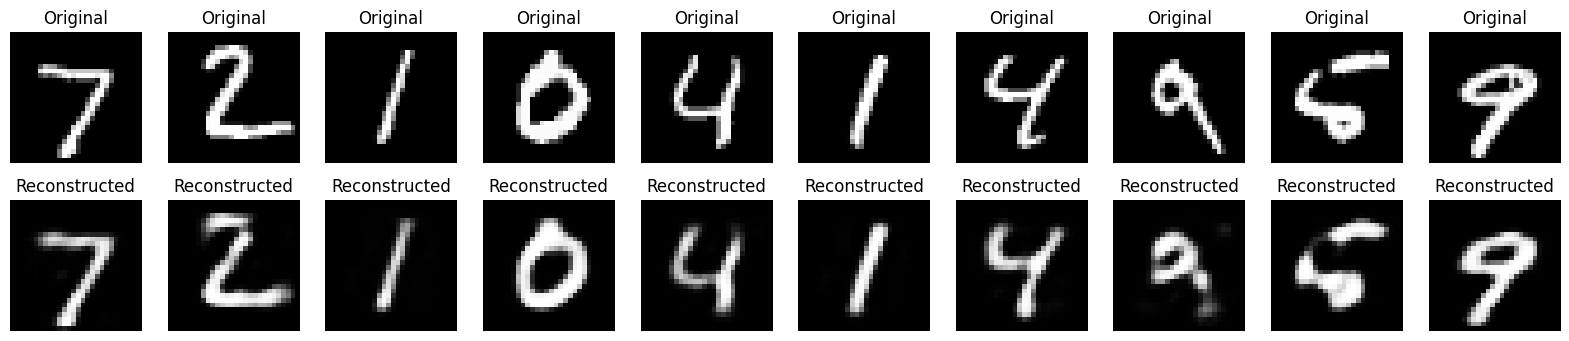

In [6]:
# Step 4: Evaluate & Visualize
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()